# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Method-section:" data-toc-modified-id="Method-section:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Method section:</a></div><div class="lev2 toc-item"><a href="#Clock-controlled--expression-simulation-based-on-peak-phase" data-toc-modified-id="Clock-controlled--expression-simulation-based-on-peak-phase-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Clock-controlled  expression simulation based on peak phase</a></div><div class="lev2 toc-item"><a href="#Metabolic-overview-posters" data-toc-modified-id="Metabolic-overview-posters-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Metabolic overview posters</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-mRNA-peak-phase" data-toc-modified-id="Clock-controlled-mRNA-peak-phase-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Clock-controlled mRNA peak phase</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-protein-peak-phase" data-toc-modified-id="Clock-controlled-protein-peak-phase-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Clock-controlled protein peak phase</a></div><div class="lev3 toc-item"><a href="#Number-of-hours-the-protein-peak-lags-behind-the-mRNA-peak" data-toc-modified-id="Number-of-hours-the-protein-peak-lags-behind-the-mRNA-peak-123"><span class="toc-item-num">1.2.3&nbsp;&nbsp;</span>Number of hours the protein peak lags behind the mRNA peak</a></div><div class="lev2 toc-item"><a href="#Metabolic-overview-animation" data-toc-modified-id="Metabolic-overview-animation-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Metabolic overview animation</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-mRNA-expression-simulation" data-toc-modified-id="Clock-controlled-mRNA-expression-simulation-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Clock-controlled mRNA expression simulation</a></div><div class="lev3 toc-item"><a href="#Clock-controlled-protein-expression-simulation" data-toc-modified-id="Clock-controlled-protein-expression-simulation-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Clock-controlled protein expression simulation</a></div><div class="lev2 toc-item"><a href="#Omics-dashboard" data-toc-modified-id="Omics-dashboard-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Omics dashboard</a></div><div class="lev3 toc-item"><a href="#Alternating-Protein-and-RNA-Oscillations-for-the-Omics-Dashboard-charts" data-toc-modified-id="Alternating-Protein-and-RNA-Oscillations-for-the-Omics-Dashboard-charts-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Alternating Protein and RNA Oscillations for the Omics Dashboard charts</a></div><div class="lev3 toc-item"><a href="#Interleaving-Protein-and-RNA-Oscillations-for-the-Omics-Dashboard-charts" data-toc-modified-id="Interleaving-Protein-and-RNA-Oscillations-for-the-Omics-Dashboard-charts-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Interleaving Protein and RNA Oscillations for the Omics Dashboard charts</a></div><div class="lev3 toc-item"><a href="#Generating-the-Omics-Dashboard-charts-in-python-ggplot" data-toc-modified-id="Generating-the-Omics-Dashboard-charts-in-python-ggplot-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Generating the Omics Dashboard charts in python ggplot</a></div><div class="lev2 toc-item"><a href="#SmartTables" data-toc-modified-id="SmartTables-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>SmartTables</a></div>

# Method section: 

## Clock-controlled  expression simulation based on peak phase


Using the peak phase data, we simulated expression of each clock-controlled mRNA and protein over a 24 hour period starting at DD.  Expression is simulated using arbitrary amplitude units that vary between 0 and 2, with 2 being the "peak phase" ($\theta$) according to  the following function:
 
$$f(\theta; t, T, A, D) = A\cos\left(\frac{2\pi(t-\theta)}{T}\right)+D$$

 
Where the period $T=24$, the amplitude $A$ and the offset $D$ both equal $1$. Time $t$ is simulated every 2 hours from DD at 0h, to 22h. 

In [1]:
%matplotlib notebook
import pandas as pd
import os, numpy as np
from math import pi
from numpy import cos
import matplotlib.pyplot as plt

class PDF(object):
    def __init__(self, pdf, size=(1200,600)):
        self.pdf = pdf
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.pdf, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.pdf)

class Animation(object):
    def __init__(self, url, size=(200,200)):
        self.url = url
        self.size = size

    def _repr_html_(self):
        return '<iframe src={0} width={1[0]} height={1[1]}></iframe>'.format(self.url, self.size)

    def _repr_latex_(self):
        return r'\includegraphics[width=1.0\textwidth]{{{0}}}'.format(self.url)

def create_oscillations_from_peak_phase(peak_phase, out, period=24, interval=2, amplitude=1, offset=1):
    t = np.linspace(0,int(period-interval), int(period/interval))
    time = ['{}h'.format(i) for i in range(0,int(period),interval)]
    oscillate = pd.DataFrame(0, index=time, columns = ['{}.7'.format(i) for i in peak_phase.index])
    for gene in peak_phase.index:
        theta = peak_phase.loc[gene,'Phase']
        oscillate['{}.7'.format(gene)] = amplitude*cos(2*pi*(t - theta)/float(period)) + offset
    oscillate.T.to_csv(out,sep='\t',index_label='$Gene')
    return oscillate.T

peakdir = os.path.join('.')
os.listdir(peakdir)

['#Protein_lags_RNA_by.tsv#',
 '.DS_Store',
 '.git',
 '.gitignore',
 '.gitignore~',
 '.ipynb_checkpoints',
 'AmineSyn.png',
 'Amino-Acid-Biosynthesis-rna-and-protein-oscillations.tab',
 'Carbohydrates-Biosynthesis-rna-and-protein-oscillations.tab',
 'Carbohydrates-Degradation-rna-and-protein-oscillations.tab',
 'CentralDogmaSubcategories.pdf',
 'Cos_math.eps',
 'dashboard.html.pdf',
 'Fatty-Acid-and-Lipid-Degradation-rna-and-protein-oscillations.tab',
 'Fermentation-rna-and-protein-oscillations.tab',
 'genes-of-Amino-Acid-Biosynthesis.tab',
 'genes-of-Carbohydrates-Biosynthesis.tab',
 'genes-of-Carbohydrates-Degradation.tab',
 'genes-of-Fatty-Acid-and-Lipid-Degradation.tab',
 'genes-of-Fermentation.tab',
 'genes-of-GLYCOLYSIS-VARIANTS.tab',
 'genes-of-Lipid-Biosynthesis.tab',
 'genes-of-Pentose-Phosphate-Cycle.tab',
 'genes-of-pwys.tsv',
 'genes-of-pwys.tsv~',
 'genes-of-Respiration.tab',
 'genes-of-rxns.tsv',
 'genes-of-rxns.tsv~',
 'genes-of-TCA-VARIANTS.tab',
 'GLYCOLYSIS-VARIANTS-r

## Metabolic overview posters

* Clock-controlled mRNA peak phase
* Clock-controlled protein peak phase
* Number of hours the protein peak lags behind the mRNA peak
* Citation:

```
S.M. Paley and P.D. Karp.
The Pathway Tools Cellular Overview Diagram and Omics Viewer,
Nucleic Acids Research 34:3771-8 (2006)
```


### Clock-controlled mRNA peak phase

In [5]:
rna_peak = pd.read_table(os.path.join(peakdir,'RNA_Peak_Phase_for_U01.txt'),index_col='ID')
rna_peak.index = ['{}.7'.format(i) for i in rna_peak.index]
PDF('https://cyc.agilebiofoundry.org/PeakPhases/RNAPeakPhase/RNAPeakPhasePortrait.pdf')

### Clock-controlled protein peak phase

In [6]:
protein_peak = pd.read_table(os.path.join(peakdir,'Protein_Peak_Phase_for_U01.txt'),index_col='ID')
protein_peak.index = ['{}.7'.format(i) for i in protein_peak.index]
PDF('https://cyc.agilebiofoundry.org/PeakPhases/ProteinPeakPhase/ProteinPeakPhasePortrait.pdf')

### Number of hours the protein peak lags behind the mRNA peak

In [7]:
prot_and_rna_peak = rna_peak.join(protein_peak, how='outer',lsuffix='_rna', rsuffix='_protein')
#prot_and_rna_peak.index = ['{}.7'.format(i) for i in prot_and_rna_peak.index]
#display(prot_and_rna_peak)
prot_and_rna_peak.to_csv(os.path.join(peakdir, 'Protein_and_RNA_Peak_phases.tsv'),sep='\t',index_label='Gene')
protein_lag = (prot_and_rna_peak['Phase_protein'] - prot_and_rna_peak['Phase_rna']).dropna().apply(lambda x: np.mod(x, 24))
protein_lag.to_csv(os.path.join(peakdir,'Protein_lags_RNA_by.tsv'),sep='\t', index_label='$Gene',header=True)
PDF('https://cyc.agilebiofoundry.org/PeakPhases/ProteinLagsRNA.pdf')


## Metabolic overview animation
 * mRNA - Using the `PwyRNAOscillations` dataset, we overlaid a 24-hour time series of clock-controlled mRNA simulated expression onto the cellular overview. 
 * protein - Using the `PwyProteinOscillations` dataset we generated an animation of the proteins using the NeurosporaCyc Omics Viewer 
 * Citation:

```
Mario Latendresse and Peter D. Karp
Web-based metabolic network visualization with a zooming user interface,
BMC Bioinformatics 12:176, (2011)
```





### Clock-controlled mRNA expression simulation 
* `RNAOscillations.tsv` contains expression data for all clock-controlled mRNA. This dataset is used to generate the mRNA Omics Dashboard charts
* `PwyRNAOscillations.tsv` contains expression data for only clock-controlled mRNA whose product is an enzyme in a known pathway. This dataset is used to generate the mRNA cellular overview animation.

In [8]:
rna_peak = pd.read_table(os.path.join(peakdir, 'RNA_Peak_Phase_for_U01.txt'),index_col='ID')
rna_oscillations = create_oscillations_from_peak_phase( rna_peak, os.path.join(peakdir,'RNAOscillations.tsv'))
pwy_genes = pd.read_table(os.path.join(peakdir,'genes-of-pwys.tsv'))
pwy_rna_oscillations = pwy_genes.join(rna_oscillations,on='$Gene', how='inner')
pwy_rna_oscillations.to_csv(os.path.join(peakdir,'PwyRNAOscillations.tsv'),sep='\t',index=False)
Animation('https://cyc.agilebiofoundry.org/PeakPhases/RNAOscillations150/index.html',size=(1000,1000))

### Clock-controlled protein expression simulation 

* `ProteinOscillations.tsv` contains expression data for all clock-controlled proteins. This dataset is used to generate the protein Omics Dashboard charts
* `PwyProteinOscillations.tsv` contains expression data for only clock-controlled proteins that are enzymes in a known pathway. This dataset is used to generate the protein cellular overview animation.

In [9]:
protein_peak = pd.read_table(os.path.join(peakdir, 'Protein_Peak_Phase_for_U01.txt'),index_col='ID')
protein_oscillations = create_oscillations_from_peak_phase( protein_peak, os.path.join(peakdir,'ProteinOscillations.tsv'))
#display(protein_oscillations)
pwy_genes = pd.read_table(os.path.join(peakdir,'genes-of-pwys.tsv'))
pwy_protein_oscillations = pwy_genes.join(protein_oscillations,on='$Gene', how='inner')
pwy_protein_oscillations.to_csv(os.path.join(peakdir,'PwyProteinOscillations.tsv'),sep='\t',index=False)
Animation('https://cyc.agilebiofoundry.org/PeakPhases/ProteinOscillations150/index.html',size=(1200,600))

## Omics dashboard

For the omics dashboard,
 * Black color represents mRNA expression
 * Red color represents protein expression
 * Each small dot represents the expression of a single gene in the pathway class (Amino Acid synthesis, for example) at a specific time point. 
 * The large dot represents the average amplitude across all genes in that pathway class for that time point.
 * The line connecting the dots represents the "spread" of different expression levels for the genes in the pathway.
 * `RNAandProteinOscillations12.pdf` displays 12 data points per clock-controlled gene, where simulated mRNA and Protein expression is alternated every 2 hours: `0h_mRNA, 2h_protein, 4h_mRNA, 6h_protein,...,20h_mRNA, 22h_protein`.  
 * `RNAandProteinOscillations24.pdf` displays  24 data points per gene, where simulated mRNA and Protein expression is interleaved:  `0h_mRNA, 0h_protein, 2h_mRNA, 2h_protein,..., 22h_mRNA, 22h_protein`
 * The Omics dashboard [[2]](http://academic.oup.com/nar/article/doi/10.1093/nar/gkx910/4508872/The-Omics-Dashboard-for-interactive-exploration-of) can be cited here:
```
Paley, S., Parker, K., Spaulding, A., Tomb, J.-F., O’Maille, P., & Karp, P. D. (2017). The Omics Dashboard for interactive exploration of gene-expression data. Nucleic Acids Research. https://doi.org/10.1093/nar/gkx910
``` 




In [10]:
protein_and_rna_oscillations = rna_oscillations.join(protein_oscillations,how='inner',lsuffix='_RNA', rsuffix='_protein')
#protein_and_rna_oscillations

### Alternating Protein and RNA Oscillations for the Omics Dashboard charts

`RNAandProteinOscillations12.tsv` contains 12 data points per clock-controlled gene, where simulated mRNA and Protein expression is alternated every 2 hours: `0h_mRNA, 2h_protein, 4h_mRNA, 6h_protein,...,20h_mRNA, 22h_protein`

In [11]:
rna_or_protein = {0: 'RNA', 2:'protein'}
protein_and_rna_oscillations[['{}h_{}'.format(t, rna_or_protein[t % 4])  
        for t in range(0,24,2) ]].\
            to_csv(os.path.join(peakdir,'ProteinAndRNAOscillations12.tsv'),sep='\t',index_label='$Gene')
PDF('https://cyc.agilebiofoundry.org/PeakPhases/RNAandProteinOscillationDashboard12.pdf')

### Interleaving Protein and RNA Oscillations for the Omics Dashboard charts

`RNAandProteinOscillations24.tsv` contains 24 data points per gene, where simulated mRNA and Protein expression is interleaved:  `0h_mRNA, 0h_protein, 2h_mRNA, 2h_protein,..., 22h_mRNA, 22h_protein`

In [12]:
protein_and_rna_oscillations[['{}h_{}'.format(t,rna_or_protein)  for t in range(0,24,2) for rna_or_protein in ['RNA','protein']]].to_csv(os.path.join(peakdir,'ProteinAndRNAOscillations24.tsv'),sep='\t',index_label='$Gene')
PDF('https://cyc.agilebiofoundry.org/PeakPhases/dashboard.html.pdf')

### Generating the Omics Dashboard charts in python ggplot

In [27]:
import ggplot
ggplot.__file__

'/Users/zuck016/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ggplot/__init__.pyc'

/Users/zuck016/.pyenv/versions/anaconda2-4.4.0/lib/python2.7/site-packages/ipykernel_launcher.py:20: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike


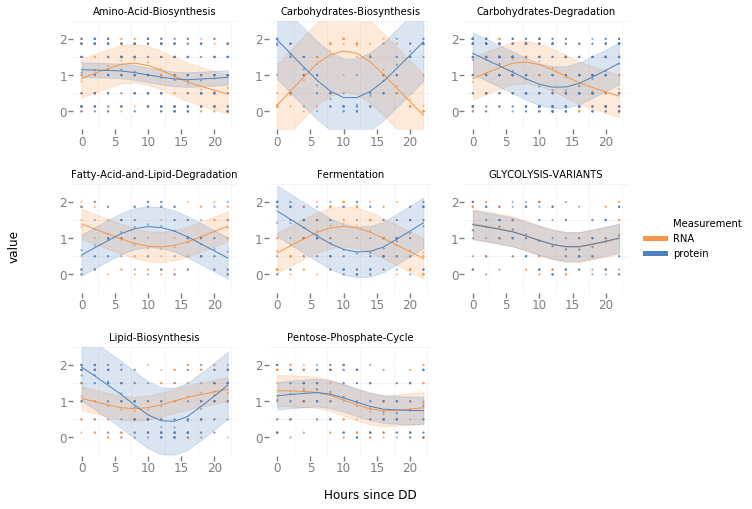

In [76]:
%matplotlib inline
from ggplot import *
import os
import pandas as pd
from IPython.display import display, HTML, Latex, Markdown
pwy_classes = ['Amino-Acid-Biosynthesis',
 'Carbohydrates-Biosynthesis',
 'Carbohydrates-Degradation',
 'Fatty-Acid-and-Lipid-Degradation',
 'Fermentation',
 'GLYCOLYSIS-VARIANTS',
 'Lipid-Biosynthesis',
 'Pentose-Phosphate-Cycle']
pwy_data = {}
melted_pwy_data = {}
stat_data = {}
protein_and_rna_oscillations = pd.read_table('ProteinAndRNAOscillations24.tsv',index_col='$Gene')
for pwy in pwy_classes:
    pwy_genes = pd.read_table('genes-of-{}.tab'.format(pwy),index_col='Gene')
    pwy_data[pwy] =protein_and_rna_oscillations.loc[pwy_genes.index].dropna()
    pwy_data[pwy].loc['Average'] = pwy_data[pwy].mean(axis=0)
    pwy_data[pwy].index.name='Gene'
    melted_pwy_data[pwy] = pwy_data[pwy].reset_index().melt(id_vars='Gene')
    melted_pwy_data[pwy]['Average'] = melted_pwy_data[pwy]['Gene'] == 'Average' 
    #melted_pwy_data[pwy]['StdDev'] = melted_pwy_data[pwy]['Gene'] == 'StdDev'
    melted_pwy_data[pwy]['Hours since DD'] =  melted_pwy_data[pwy]['variable'].str.extract(r'^(\d+)',expand=False).astype(int)
    melted_pwy_data[pwy]['Measurement'] = melted_pwy_data[pwy]['variable'].str.split('_').str.get(1)
    melted_pwy_data[pwy]['PathwayClass'] = pwy
    melted_pwy_data[pwy].to_csv('{}-rna-and-protein-oscillations.tab'.format(pwy),sep='\t',index=False)
    pwy_data[pwy].loc['StdDev'] = pwy_data[pwy].std(axis=0)
    pwy_data[pwy].loc['ErrorBarBottom'] = pwy_data[pwy].loc['Average'] - 0.5*pwy_data[pwy].loc['StdDev']
    pwy_data[pwy].loc['ErrorBarTop'] = pwy_data[pwy].loc['Average'] + 0.5*pwy_data[pwy].loc['StdDev']
    stat_data[pwy] = pwy_data[pwy].loc[['Average','StdDev','ErrorBarBottom','ErrorBarTop']]
    stat_data[pwy]['PathwayClass'] = pwy
    stat_data[pwy] = stat_data[pwy].reset_index()
#stat_pwy_data = pd.concat(pwy_data.values(),ignore_index=True)
#display(stat_pwy_data)    
all_pwy_data = pd.concat(melted_pwy_data.values(),ignore_index=True)
all_pwy_data.to_csv('pwy-rna-and-protein-oscillations.tab',sep='\t',index=False)
#display(all_pwy_data)
#avg_pwy_data = 
p = ggplot(aes(x='Hours since DD', y='value', color='Measurement'),data=all_pwy_data) + \
    geom_point(size=5, alpha=0.6)  + \
    stat_smooth(method='loess', size=1, window=20, alpha=0.001) + \
    facet_wrap('PathwayClass') + \
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw() + \
    ylim(-0.5,2.5)


p.save('ProteinAndRNAOscillations.pdf')


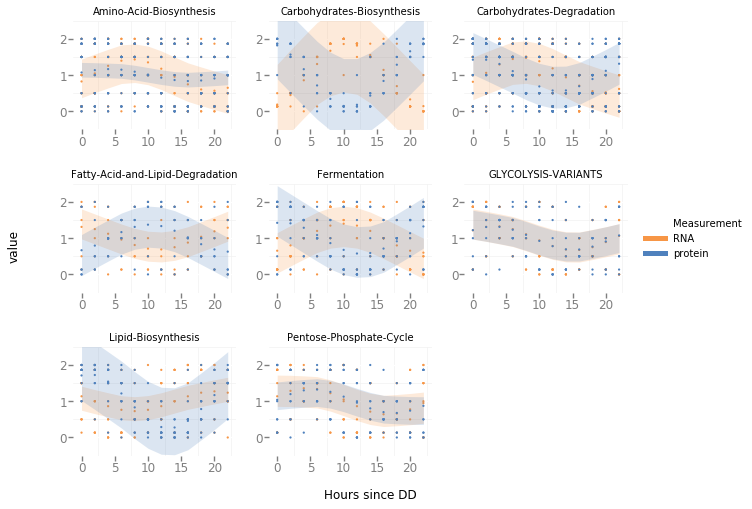

In [98]:
p = ggplot(aes(x='Hours since DD', y='value', color='Measurement'),data=all_pwy_data) + \
    stat_smooth(method='loess', window=1,size=0, alpha=0.001, se=True) +  \
    facet_wrap('PathwayClass') + \
    geom_point(size=5,alpha=1) +\
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw() + \
    ylim(-0.5,2.5)
    #geom_errorbar(x='Hours since DD',y='value', color='Measurement') + \

p.save('ProteinAndRNAOscillationsNoSE.pdf')


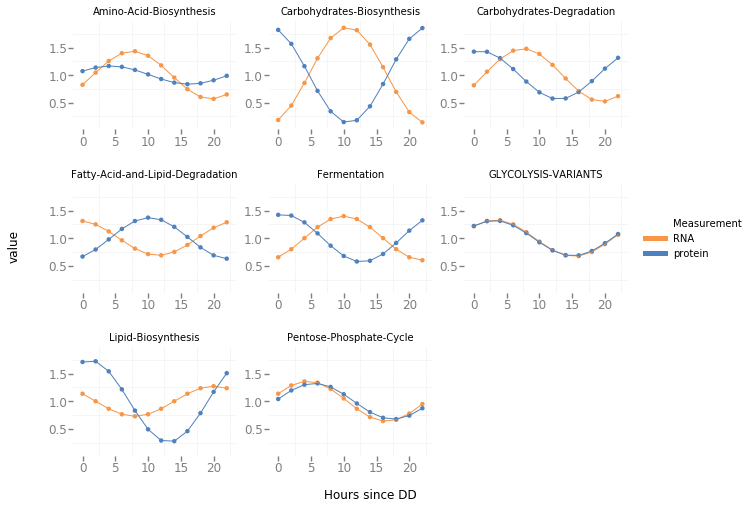

In [20]:
p = ggplot(aes(x='Hours since DD', y='value', color='Measurement'), 
           data=all_pwy_data[(all_pwy_data['Average']==True)]) +\
    geom_line()  + \
    geom_point()  +  \
    facet_wrap('PathwayClass') + \
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw()
p.save('MeanRNAandProteinOscillations.pdf')

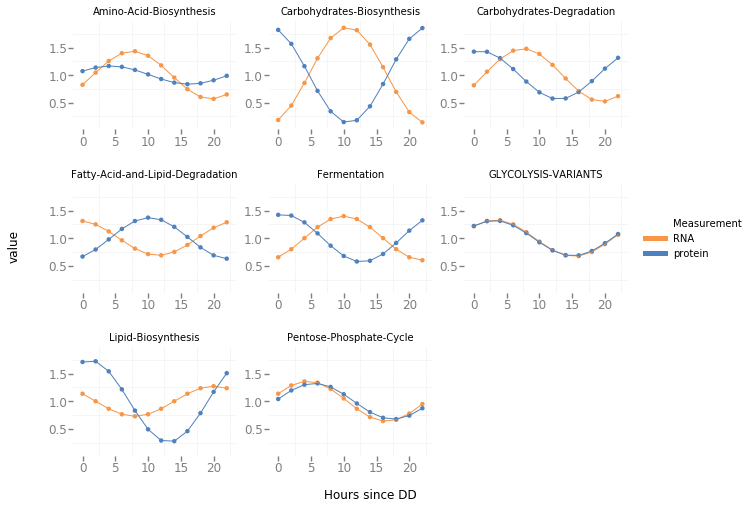

In [20]:
p = ggplot(aes(x='Hours since DD', y='value', color='Measurement'), 
           data=all_pwy_data[(all_pwy_data['Average']==True)]) +\
    geom_line()  + \
    geom_point()  +  \
    facet_wrap('PathwayClass') + \
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw()
p.save('MeanRNAandProteinOscillations.pdf')

,PathwayClass,Measurement,Hours since DD,variable,Average,ErrorBarBottom,ErrorBarTop,StdDev
Gene,,,,,,,,
0,Amino-Acid-Biosynthesis,RNA,0,0h_RNA,0.823993,0.477249,1.170737,0.693488
1,Amino-Acid-Biosynthesis,RNA,2,2h_RNA,1.045910,0.697346,1.394474,0.697128
2,Amino-Acid-Biosynthesis,RNA,4,4h_RNA,1.255525,0.935019,1.576031,0.641013
3,Amino-Acid-Biosynthesis,RNA,6,6h_RNA,1.396673,1.109120,1.684225,0.575105
4,Amino-Acid-Biosynthesis,RNA,8,8h_RNA,1.431532,1.146188,1.716876,0.570688
5,Amino-Acid-Biosynthesis,RNA,10,10h_RNA,1.350763,1.034229,1.667297,0.633068
6,Amino-Acid-Biosynthesis,RNA,12,12h_RNA,1.176007,0.829263,1.522751,0.693488
7,Amino-Acid-Biosynthesis,RNA,14,14h_RNA,0.954090,0.605526,1.302654,0.697128
8,Amino-Acid-Biosynthesis,RNA,16,16h_RNA,0.744475,0.423969,1.064981,0.641013


AttributeError: 'str' object has no attribute 'shape'

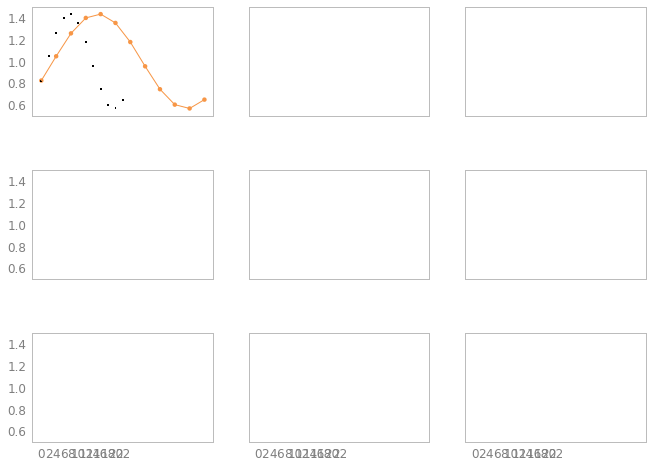

In [93]:
melted_stat_data = pd.concat(stat_data.values(),ignore_index=True).melt(id_vars=['PathwayClass','Gene'])
melted_stat_data['Hours since DD'] =  melted_stat_data['variable'].str.extract(r'^(\d+)',expand=False).astype(int)
melted_stat_data['Measurement'] = melted_stat_data['variable'].str.split('_').str.get(1)
melted_stat_data = melted_stat_data.set_index(['PathwayClass','Measurement','Hours since DD','variable','Gene']).unstack().reset_index()
#ggplot(aes(x='Hours since DD', y='value', color='Measurement'),data=all_pwy_data) + geom_point()  +  facet_wrap('PathwayClass') + scale_color_manual(values=['#F79646','#4F81BD']) + theme_bw()
for idx in ['Average', u'ErrorBarBottom', u'ErrorBarTop',
       u'StdDev']:
        melted_stat_data[idx] = melted_stat_data['value',idx]
del melted_stat_data['value']
display(melted_stat_data)
p = ggplot(aes(x='Hours since DD', y='Average', color='Measurement'),
       data=melted_stat_data) + \
    geom_point()  +    \
    geom_line() + \
    geom_errorbar(aes(ymin='ErrorBarBottom', ymax='ErrorBarTop',x='Hours since DD', color='Measurement')) + \
    facet_wrap('PathwayClass') +\
    scale_color_manual(values=['#F79646','#4F81BD']) + \
    theme_bw()
p

## SmartTables
  * Hours the Protein peak lags behind the RNA peak.
  * Clock-controlled mRNA and Protein Peak Phases for Neurospora
  * 24-hour simulated expression based on peak phase:
      * all clock-controlled mRNA's in *N. crassa*
      * all clock-controlled proteins in *N. crassa*
      * clock-controlled protein that are enzymes in a known *N. crassa* pathway
      * clock-controlled mRNA whose product is an enzyme in a known *N. crassa* pathway
      * `RNAandProteinOscillations12` contains 12 data points per clock-controlled gene, where simulated mRNA and Protein expression is alternated every 2 hours: `0h_mRNA, 2h_protein, 4h_mRNA, 6h_protein,...,20h_mRNA, 22h_protein`
      * `RNAandProteinOscillations24` contains 24 data points per gene, where simulated mRNA and Protein expression is interleaved:  `0h_mRNA, 0h_protein, 2h_mRNA, 2h_protein,..., 22h_mRNA, 22h_protein`
  * Citation:

```
[PTools13] Mike Travers., S.M Paley., J.Shrager., T.A Holland., and Peter Karp
Groups:knowledge spreadsheets for symbolic biocomputing
Database, doi:10.1093/database/bat061 (2013)```


 